機械学習における基本的な実装の手順
1. データの読み込み
2. 訓練データと評価データの準備
3. アルゴリズムの選択
4. 学習
5. 予測
6. モデルの評価
---
Basic implementation steps in machine learning
1. Load data
2. Prepare training and test data
3. Select an algorithm
4. Learning
5. Predict
6. Evaluate the model

データセット
* 機械学習問題において使われているBoston House Prices: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices データセットを使用します。注釈: Kaggleは企業や研究者がデータを投稿し、世界中の統計家やデータ分析家がその最適モデルを競い合う、予測モデリング及び分析手法関連プラットフォーム及びその運営会社です。
* このデータセットには 506 件のサンプルが含まれており、13属性（説明変数）＋1属性（目的変数）の14属性で構成されています。
* 目的変数は、住宅価格（MEDV）になります。
---
Dataset
* We will use the Boston House Prices: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices dataset used in the machine learning problem. Note: Kaggle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.
* The dataset contains 506 samples and consists of 14 attributes: 13 attributes (explanatory variables) + 1 attribute (objective variable).
* The objective variable is the house price (MEDV).

目的
* データセットを用いて、**13の説明変数**から**住宅価格(MDEV)**を予測する**重回帰モデル**を実装します。
---
Objective
* Using the dataset, we implement **a multiple regression model** to predict **house price (MDEV)** from **13 explanatory variables**.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* 線形回帰モデルとは、説明変数の値から目的変数の値を予測するモデルです。
* scikit-learn には、線形回帰による予測を行うクラスとして、sklearn.linear_model.LinearRegression が用意されています。
---
* A linear regression model is a model that predicts the value of an objective variable from the values of explanatory variables.
* scikit-learn provides sklearn.linear_model.LinearRegression as a class to make predictions by linear regression.

In [2]:
# ライブラリのインポート/Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pandas.DataFrame.head: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
* Pandasのheadメソッドは、データフレームの最初の行を表示するためのメソッドです。
* Pandas' head method is used to display the first row of the data frame.

In [3]:
#1 データセットの読み込み/Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5data/BostonHousing.csv')

# 先頭5行の表示/Display the first five rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


pandas.DataFrame.shape: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
* Pandasのデータフレームの行数と列数を調べるために使用するメソッドは、pandasのshapeメソッドです。
* Pandas' shape method is the method used to find out the number of rows and columns in a Pandas data frame.

In [4]:
# データフレームの形状/Shape of the data frame
print('Shape of the data frame', df.shape)

Shape of the data frame (506, 14)


In [5]:
# 説明変数を設定 全ての説明変数を選択/Set explanatory variables Select all explanatory variables
X = df.iloc[:, 0:13].values
# 目的変数に住宅価格(MDEV)を設定/Set housing price (MDEV) as the target variable
y = df['medv'].values

# 説明変数と目的変数の先頭5行を表示/Display the first 5 rows of the explanatory and target variables
X[:5], y[:5]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9463e+02, 2.9400e+00],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9690e+02, 5.3300e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2]))

In [6]:
# 説明変数と目的変数の形状/Shape of explanatory and target variables
X.shape, y.shape

((506, 13), (506,))

train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* 引数test_sizeでテスト用の割合または個数を指定できる。
* デフォルトはtest_size=0.25で25%がテスト用、残りの75%が訓練用。
---
* The argument test_size can be used to specify a percentage or number of pieces for testing.
* The default is test_size=0.25 with 25% for testing and the remaining 75% for training.

In [7]:
#2 訓練データと評価データに分割/Split into training data and test data
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3)

* モデル格納用の変数modelに線形回帰の「LinearRegression」をセットし、訓練データXと正解yを引数にして、**fitメソッド**でモデルの訓練を実行します。
* **fit()メソッド**は与えられたデータを学習するために使用します。
* 構文: fit(training data, label, sample_weight=None)
---
* Set "LinearRegression" of linear regression to the variable "model" for storing the model, and execute training of the model with **the fit method** using the training data X and the correct answer y as arguments.
* **The fit() method** is used to train on given data.
* Syntax: fit(training data, label, sample_weight=None)

クラス、**メソッド**、インスタンス/Class, **method**, and instance: https://qiita.com/NM512/items/b57b3a4b42412e14d3cd

Instance method: https://atmarkit.itmedia.co.jp/ait/articles/1908/16/news115.html

Methods: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* ↓TensorFlowのSequentialというクラスと、その下の階層のcompile、fit、evaluateというメソッドの構造を以下の図に示します。
* 変数modelの中（.）のcompile関数、fit関数、evaluate関数が呼び出されている。これらがインスタンスメソッドである。
---
* ↓The following figure shows the structure of TensorFlow's class Sequential and its lower-level methods compile, fit, and evaluate.
* In the variable model (.) the compile function, the fit function, and the evaluate function are called. These are instance methods.

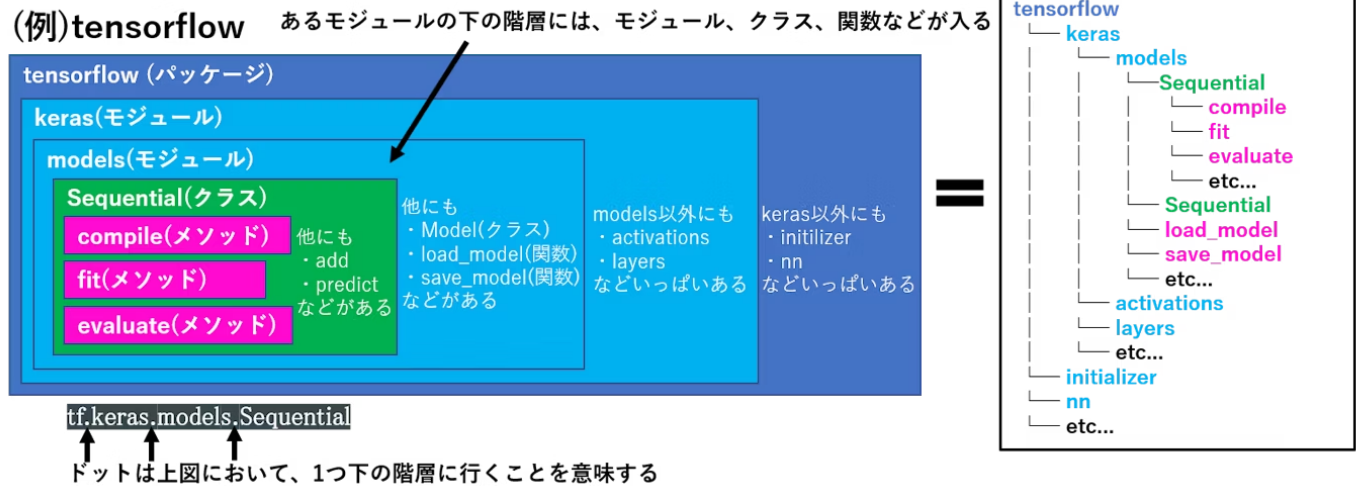

* ↑Pythonのプログラムコードでは、下の階層に行くことを.(ドット)で示します。
* ↑In Python program code, going down the hierarchy is indicated by a . (dot) to indicate that you are going to the lower level.

In [8]:
#3 モデル選択 -> 線形回帰/Select model -> Linear regression
model = LinearRegression() #線形回帰クラスのインスタンスを生成/Create an instance of the linear regression class

#4 学習/Learning
# 学習するには、生成したmodelインスタンスからfit()メソッドを呼ぶ
# To learn, call the fit() method from the generated model instance
model.fit(X_train, y_train) #fit()メソッドに訓練データを与えて学習させる/Training data is given to the fit() method for training

LinearRegression()

In [9]:
#5 評価データを使った予測/Predict using test data
# predict()メソッドに説明変数を与えてターゲットを予測
# Predict a target by giving an explanatory variable to the predict() method
y_pred = model.predict(X_test)
print(y_pred[0]*1000)

37347.32793582261


sklearn.metrics.mean_squared_error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* scikit-learnのライブラリを用いて、回帰モデルの予測精度を評価します。
* 平均二乗誤差 (Mean Squared Error：MSE)は予測モデルの評価に用いられます。
---
* Using the scikit-learn library, we evaluate the predictive accuracy of regression models.
* Mean Squared Error (MSE) is used to evaluate the predictive model.

In [10]:
#6 モデルの評価/Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)

23.142493690180775


指標の見方/How to read the indicators
* MSE: 0に近いほど良い。
* MSE: The closer to 0, the better.